# redefine effect of DE FoM on power spectrum

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


# preliminaries

In [2]:
# set cosmological parameters
# copied from FisherCl

cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        #'w'     : -1.0, # DARK ENERGY!!!
        'w'     : -0.95, # DARK ENERGY!!!
        'wa'    : 0.0,

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1, #this param should be ignored except in degenerate hierarchy
        'neutrino_hierarchy'      : 'degenerate'}
        #'neutrino_hierarchy'      : 'normal'}

In [3]:
AccuracyBoost = 3
nonlinear = False #True
nz = 300000
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,  0.1] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0

In [4]:
# modified param lists
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
    # add parameter dictionary to lists; HAVE TO BE COPIES!!!
    myParamsUpper.append(cosParams.copy())
    myParamsLower.append(cosParams.copy())
    # modify parameter number cParamNum in ditionaries
    myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
    myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]
print 'done.'

done.


In [5]:
# get fiducial P
myPk = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**cosParams)
print 'done.'

neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
done.


# get perturbed matter power spectra and build derivatives

In [6]:
#get-perturbed-matter-power-spectra-and-build-derivatives# get matter power spectra
# suppose that changing dark energy parameters (globally) does not affect already computed PK
# set return_z_k = True in cp.MatterPower.makePKinterp

# vary w0
w0Ind = 7
myPk_w0_upper = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsUpper[w0Ind])
myPk_w0_lower = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsLower[w0Ind])
        
# vary wa
waInd = 8
myPk_wa_upper = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsUpper[waInd])
myPk_wa_lower = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsLower[waInd])
        
print 'done.'

neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [7]:

print myPk.zArray.shape,myPk.zArray[0],myPk.zArray[-1]
print myPk_w0_upper.zArray.shape,myPk_w0_upper.zArray[0],myPk_w0_upper.zArray[-1]
print myPk_w0_lower.zArray.shape,myPk_w0_lower.zArray[0],myPk_w0_lower.zArray[-1]
print myPk_wa_upper.zArray.shape,myPk_wa_upper.zArray[0],myPk_wa_upper.zArray[-1]
print myPk_wa_lower.zArray.shape,myPk_wa_lower.zArray[0],myPk_wa_lower.zArray[-1]

print myPk.kArray.shape,myPk.kArray[0],myPk.kArray[-1]
print myPk_w0_upper.kArray.shape,myPk_w0_upper.kArray[0],myPk_w0_upper.kArray[-1]
print myPk_w0_lower.kArray.shape,myPk_w0_lower.kArray[0],myPk_w0_lower.kArray[-1]
print myPk_wa_upper.kArray.shape,myPk_wa_upper.kArray[0],myPk_wa_upper.kArray[-1]
print myPk_wa_lower.kArray.shape,myPk_wa_lower.kArray[0],myPk_wa_lower.kArray[-1]


(100,) 0.0 1088.4400579363114
(100,) 0.0 1089.5586095249687
(100,) 0.0 1089.558861576482
(100,) 0.0 1089.5582050994406
(100,) 0.0 1089.559307779927
(1488,) 2.350779e-06 10.002444
(1488,) 2.3507787e-06 10.002443
(1488,) 2.350779e-06 10.002443
(1488,) 2.350778e-06 10.002443
(1488,) 2.35078e-06 10.002444


# create numeric derivatives dP(z,k)/dw0, dP(z,k)/dwa

In [8]:
# create numeric derivatives dP(z,k)/dw0, dP(z,k)/dwa

# the upper PKs have lower z_max than lower PKs
# the lower PKs have higher k_min and le k_max than upper
dPdw0 = (myPk_w0_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)-
         myPk_w0_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray))/(2*deltaP[w0Ind])
dPdwa = (myPk_wa_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)-
         myPk_wa_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray))/(2*deltaP[waInd])
Pzk =myPk.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
print 'done.'

done.


In [9]:
print dPdw0.shape,dPdwa.shape,Pzk.shape

(100, 1488) (100, 1488) (100, 1488)


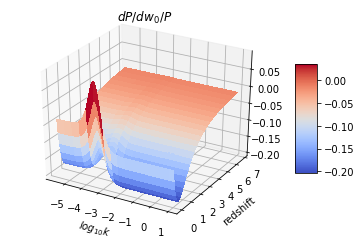

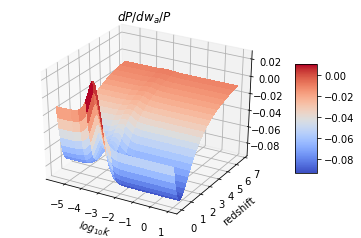

In [10]:
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0/Pzk
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa/Pzk
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [11]:
# extend dP/dw0, dP/dwa to higher z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation

# create larger arrays
dPdw0_ex = np.empty((np.shape(dPdw0)[0]+1,np.shape(dPdw0)[1]+2))
dPdwa_ex = np.empty((np.shape(dPdwa)[0]+1,np.shape(dPdwa)[1]+2))
myZs = np.empty(np.shape(dPdw0)[0]+1)
myKs = np.empty(np.shape(dPdw0)[1]+2)

# populate them.  start with copy of non-extended area
dPdw0_ex[:-1,1:-1]=dPdw0.copy()
dPdwa_ex[:-1,1:-1]=dPdwa.copy()

# extend to higher redshift
myZmax = 1200
deltaZ = myZmax-myPk_w0_upper.zArray[-1]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dP0 = dPdw0[-1,kInd]-dPdw0[-2,kInd]
    dPa = dPdwa[-1,kInd]-dPdwa[-2,kInd]
    dPdw0_ex[-1,kInd+1] = dP0/dz*deltaZ + dPdw0[-1,kInd]
    dPdwa_ex[-1,kInd+1] = dPa/dz*deltaZ + dPdwa[-1,kInd]

# copy to wider k-range
dPdw0_ex[:,0] = dPdw0_ex[:,1]  
dPdwa_ex[:,0] = dPdwa_ex[:,1] 
dPdw0_ex[:,-1] = dPdw0_ex[:,-2]  
dPdwa_ex[:,-1] = dPdwa_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





done.


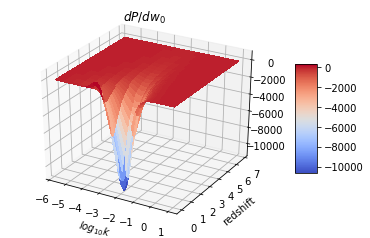

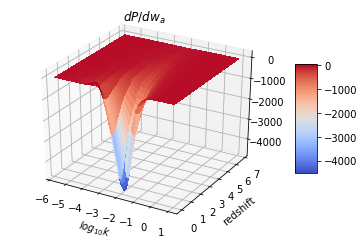

In [12]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLow = 0
zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








In [13]:
# save them for use in 'remake w0, wa' notebook!
np.save('dPdw0_ex.npy',[myZs, myKs, dPdw0_ex])
np.save('dPdwa_ex.npy',[myZs, myKs, dPdwa_ex])


# Calculate g factors for multiplicative changes to P

In [14]:
# The quantity to average for making w like bias:
# g = 1 + dP/dw*dw/P = 1 + dP/P

g_0 = np.ones((myPk_w0_upper.zArray.size,myPk_w0_lower.kArray.size)) + dPdw0*(2*deltaP[w0Ind])/Pzk
g_a = np.ones((myPk_w0_upper.zArray.size,myPk_w0_lower.kArray.size)) + dPdwa*(2*deltaP[waInd])/Pzk

print 'ok.'

ok.


In [15]:
# extend g_0, g_a to higher z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation

# create larger arrays
g_0_ex = np.empty((np.shape(g_0)[0]+1,np.shape(g_0)[1]+2))
g_a_ex = np.empty((np.shape(g_a)[0]+1,np.shape(g_a)[1]+2))
myZs = np.empty(np.shape(g_0)[0]+1)
myKs = np.empty(np.shape(g_0)[1]+2)

# populate them.  start with copy of non-extended area
g_0_ex[:-1,1:-1]=g_0.copy()
g_a_ex[:-1,1:-1]=g_a.copy()

# extend to higher redshift
myZmax = 1200
deltaZ = myZmax-myPk_w0_upper.zArray[-1]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dP0 = g_0[-1,kInd]-g_0[-2,kInd]
    dPa = g_a[-1,kInd]-g_a[-2,kInd]
    g_0_ex[-1,kInd+1] = dP0/dz*deltaZ + g_0[-1,kInd]
    g_a_ex[-1,kInd+1] = dPa/dz*deltaZ + g_a[-1,kInd]

# copy to wider k-range
g_0_ex[:,0] = g_0_ex[:,1]  
g_a_ex[:,0] = g_a_ex[:,1] 
g_0_ex[:,-1] = g_0_ex[:,-2]  
g_a_ex[:,-1] = g_a_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





done.


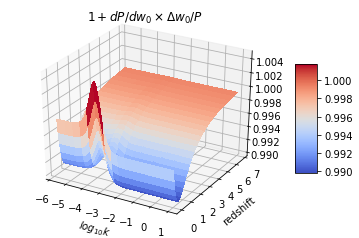

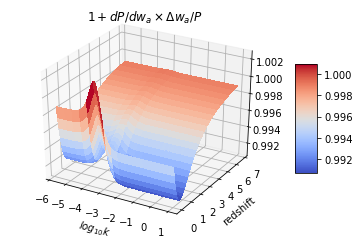

In [16]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLow = 0
zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = g_0_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$1+dP/dw_0 \times \Delta w_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = g_a_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$1+dP/dw_a \times \Delta w_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








In [17]:
print g_0_ex.shape
print g_a_ex.shape
print myZs.shape, myKs.shape

(101, 1490)
(101, 1490)
(101,) (1490,)


In [18]:
# save them for use in 'remake w0, wa' notebook!
np.save('g_0_ex.npy',[myZs, myKs, g_0_ex])
np.save('g_a_ex.npy',[myZs, myKs, g_a_ex])
